In [1]:
import pandas as pd  # Manipulation des données
import numpy as np   # Calculs mathématiques
import matplotlib.pyplot as plt  # Visualisation
import seaborn as sns  # Visualisation avancée

# Afficher les graphiques directement dans le notebook
%matplotlib inline

In [2]:
df = pd.read_csv("Sample_Superstore.csv", encoding='latin-1')
df_copy = df.copy()
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
numerical_analysis_vars = [
    'Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
    'Product ID', 'Category', 'Sub-Category', 'Product Name',
    'Sales', 'Quantity', 'Discount', 'Profit'
]

df_analysis = df[numerical_analysis_vars].copy()

In [4]:
df_analysis.isnull().sum()

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df_analysis.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Second Class,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df_analysis["Order Date"] = pd.to_datetime(df_analysis["Order Date"])
df_analysis["Ship Date"] = pd.to_datetime(df_analysis["Ship Date"])

In [7]:
df_analysis.dtypes

Order Date      datetime64[ns]
Ship Date       datetime64[ns]
Ship Mode               object
Segment                 object
Country                 object
City                    object
State                   object
Region                  object
Product ID              object
Category                object
Sub-Category            object
Product Name            object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

In [8]:
df_analysis.select_dtypes(include='number').describe().drop("count").round(2)

,Sales,Quantity,Discount,Profit
mean,229.86,3.79,0.16,28.66
std,623.25,2.23,0.21,234.26
min,0.44,1.00,0.00,-6599.98
25%,17.28,2.00,0.00,1.73
50%,54.49,3.00,0.20,8.67
75%,209.94,5.00,0.20,29.36
max,22638.48,14.00,0.80,8399.98


In [9]:
df_analysis.groupby('Category')[['Sales', 'Profit']].mean()


,Sales,Profit
Category,,
Furniture,349.834887,8.699327
Office Supplies,119.324101,20.327050
Technology,452.709276,78.752002


<Axes: xlabel='Category', ylabel='Count'>

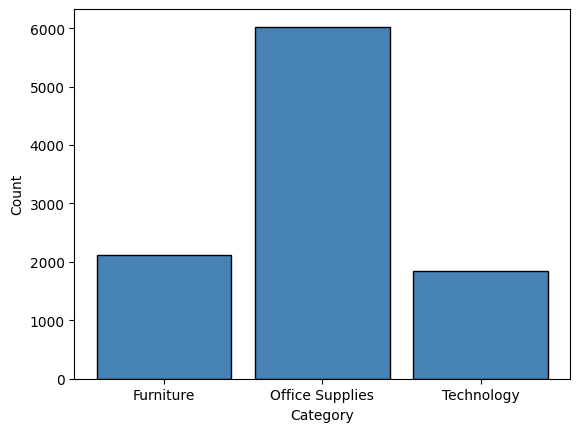

In [10]:
sns.histplot(data=df, x="Category", bins=20, color="steelblue", shrink=0.85, alpha=1)

In [11]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

<Axes: xlabel='Region', ylabel='Count'>

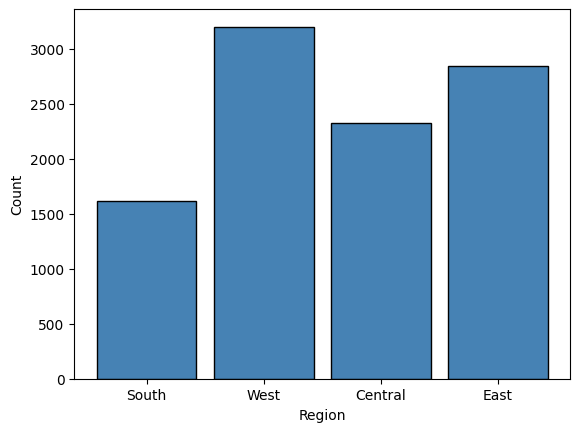

In [12]:
sns.histplot(data=df, x="Region", bins=20, color="steelblue", shrink=0.85, alpha=1)

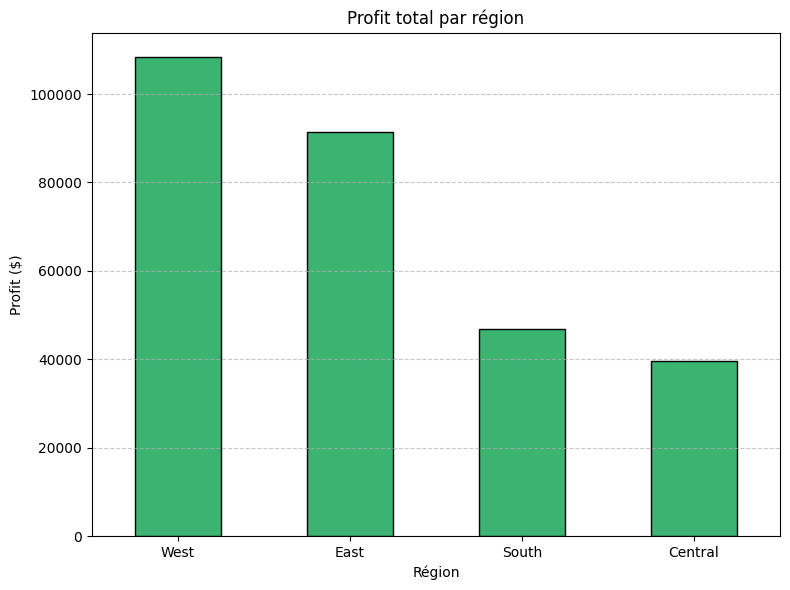

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Groupement des profits par région
profit_par_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

# Affichage du graphique
plt.figure(figsize=(8,6))
profit_par_region.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Profit total par région')
plt.xlabel('Région')
plt.ylabel('Profit ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [14]:
# Calcul du ratio bénéfice / nombre de commandes par région
test = df_analysis['Region'].value_counts()
test

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [15]:
profit_per_order_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
profit_per_order_region

Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

In [16]:
profit_per_order_region/test

Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
dtype: float64

In [17]:
tableau = df_analysis.groupby(['Region'])['Profit'].sum().sort_values(ascending=False).reset_index()
tableau

,Region,Profit
0,West,108418.4489
1,East,91522.7800
2,South,46749.4303
3,Central,39706.3625


In [18]:
pivot = df.pivot_table(
    index='Region',
    columns='Sub-Category',
    values='Profit',
    aggfunc='sum',
    fill_value=0
).round(2)

pivot

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Region,,,,,,,,,,,,,,,,,
Central,7251.63,-2638.62,1195.16,-1043.64,-1997.90,6592.72,15608.84,1777.53,236.62,-3906.22,1073.08,-1486.07,6971.90,12323.03,1969.84,-661.89,-3559.65
East,11195.86,8391.41,1899.94,11267.93,-1167.63,9357.77,17022.84,1812.41,263.99,5881.41,1129.28,6928.64,9015.37,12314.69,8389.37,-1155.14,-11025.38
South,7004.54,4123.94,1058.59,3900.66,1339.49,6612.09,3658.91,1465.48,173.72,3442.68,1040.77,-1438.89,5947.06,10767.28,2274.30,1.88,-4623.06
West,16484.60,8261.27,2374.10,16096.80,-1646.51,4027.58,19327.24,1908.76,275.19,7641.27,2303.12,-618.93,12119.24,9110.74,8645.32,626.05,1482.61


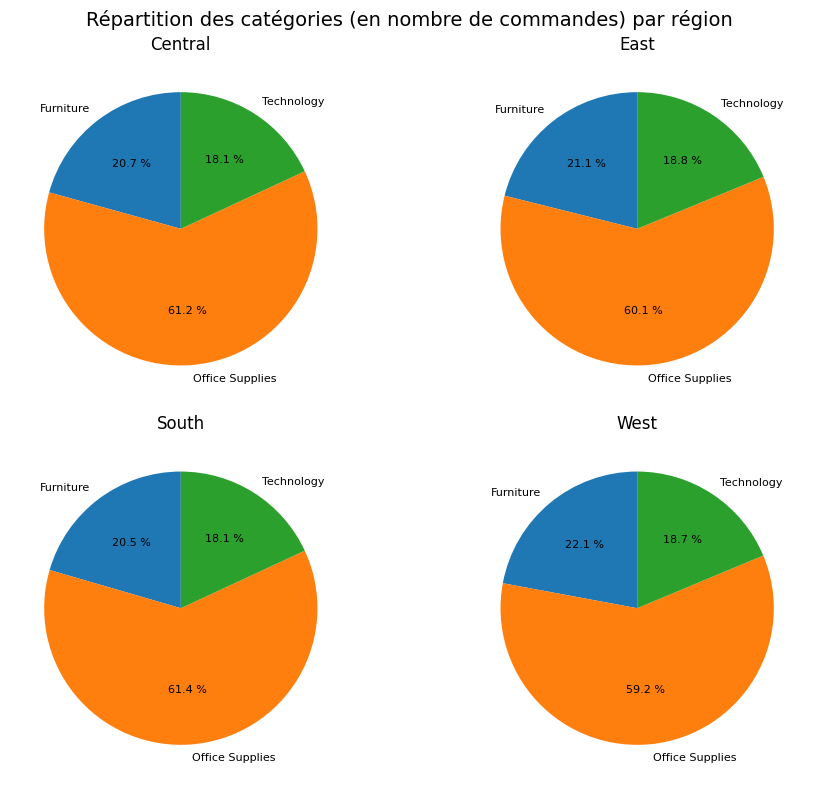

In [19]:
import matplotlib.pyplot as plt

# Groupe les données : nombre de commandes (nb de lignes)
grouped = df.groupby(['Region','Category']).size().reset_index(name='Count')

# Liste des régions
regions = grouped['Region'].unique()

# Création des subplots 2 lignes × 2 colonnes
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()  # Pour accéder facilement aux axes comme une liste

for i, region in enumerate(regions):
    data = grouped[grouped['Region'] == region]
    axs[i].pie(
        data['Count'],
        labels=data['Category'],
        autopct=lambda p: f'{p:.1f} %' if p > 3 else '',
        startangle=90,
        textprops={'fontsize': 8}
    )
    axs[i].set_title(region)

# Cache les éventuels axes en trop (au cas où tu aurais moins de 4 régions un jour)
for j in range(len(regions), len(axs)):
    axs[j].axis('off')

plt.suptitle("Répartition des catégories (en nombre de commandes) par région", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Laisse un peu de place pour le titre
plt.show()


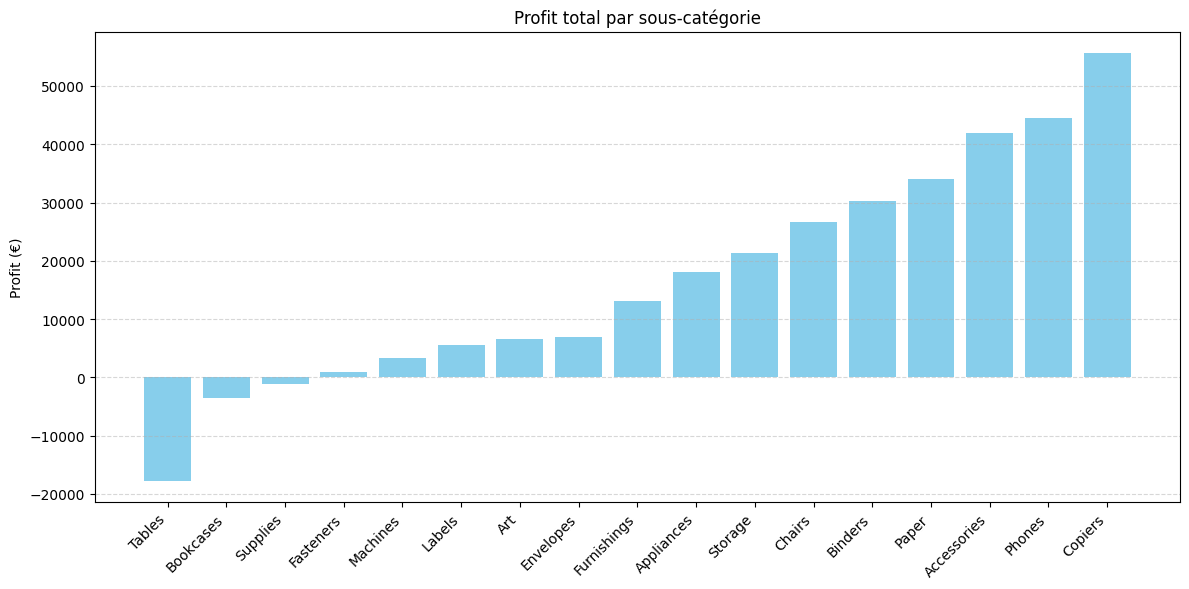

In [20]:
import matplotlib.pyplot as plt

# Grouper les données : profit total par sous-catégorie
grouped = df.groupby('Sub-Category')['Profit'].sum().sort_values()

# Affichage du bar chart
plt.figure(figsize=(12, 6))
plt.bar(grouped.index, grouped.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Profit (€)')
plt.title('Profit total par sous-catégorie')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#ajotuer les couleurs selon les regions ?

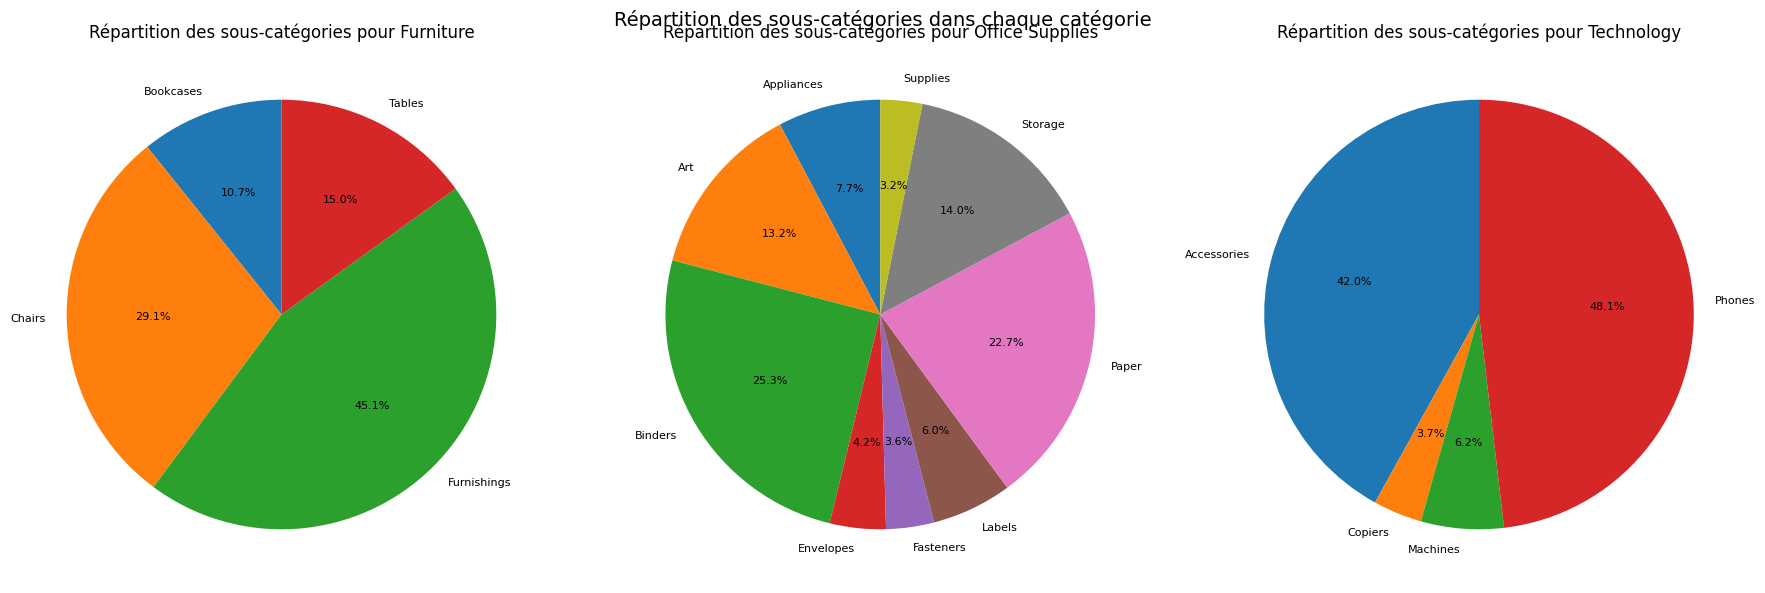

In [21]:
import matplotlib.pyplot as plt

# Sélectionner les catégories d'intérêt (par exemple, 3 catégories)
categories = df['Category'].unique()

# Filtrer et grouper les données par catégorie et sous-catégorie
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, category in enumerate(categories):
    data = df[df['Category'] == category].groupby('Sub-Category').size()
    
    # Pie chart pour chaque catégorie
    axs[i].pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8}
    )
    axs[i].set_title(f"Répartition des sous-catégories pour {category}")

plt.suptitle("Répartition des sous-catégories dans chaque catégorie", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Ajuster pour le titre
plt.show()


In [22]:
ans = df_analysis.groupby(['Category'])['Profit'].sum().sort_values(ascending=False).reset_index()
ans

,Category,Profit
0,Technology,145454.9481
1,Office Supplies,122490.8008
2,Furniture,18451.2728


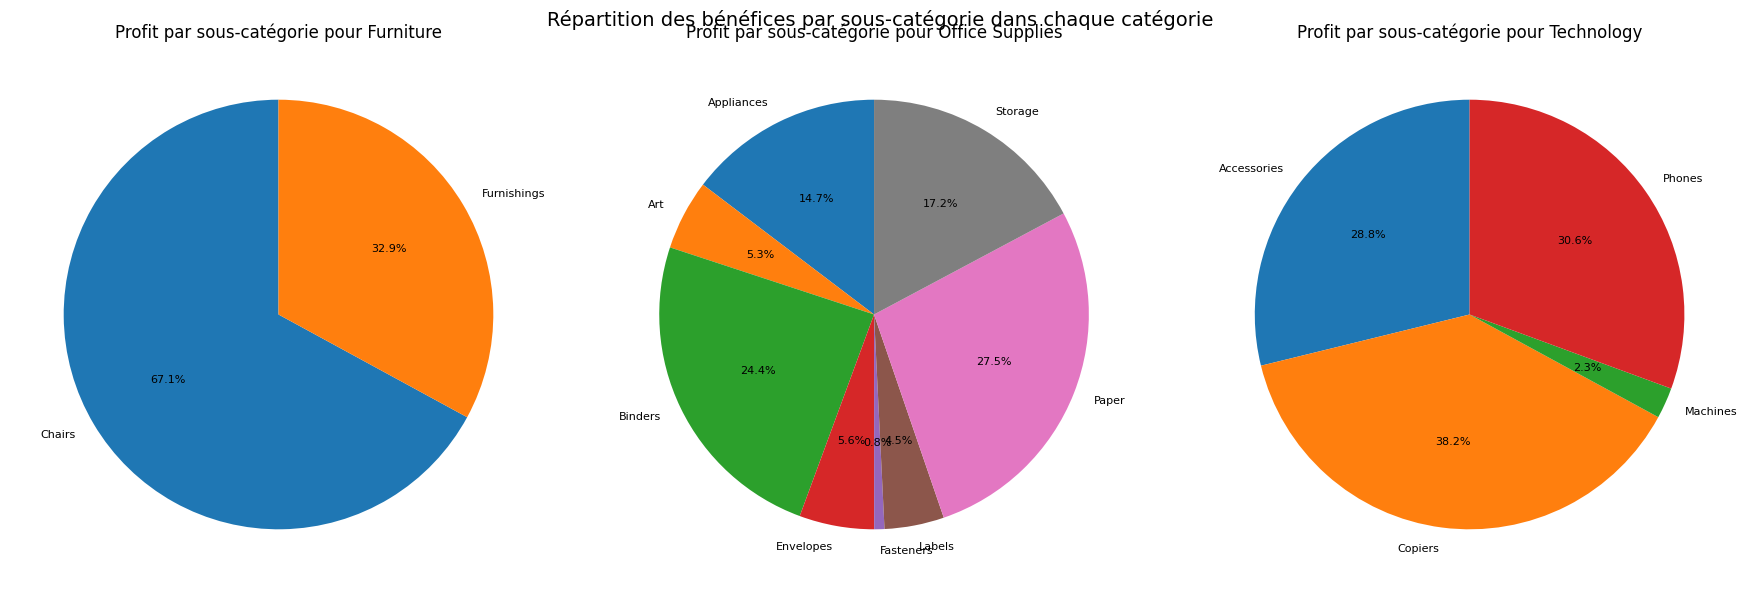

In [23]:
import matplotlib.pyplot as plt

# Sélectionner les catégories d'intérêt (par exemple, 3 catégories)
categories = df['Category'].unique()  # Choisir les 3 premières, ou spécifier des catégories spécifiques

# Filtrer et grouper les données par catégorie et sous-catégorie, en sommant les profits
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, category in enumerate(categories):
    # Grouper par sous-catégorie et calculer le profit total, en filtrant les profits négatifs
    data = df[df['Category'] == category].groupby('Sub-Category')['Profit'].sum()
    data = data[data >= 0]  # Filtrer les sous-catégories avec un profit négatif
    
    # Si aucune sous-catégorie n'a un profit positif, on passe à la suivante
    if len(data) > 0:
        axs[i].pie(
            data,
            labels=data.index,
            autopct='%1.1f%%',
            startangle=90,
            textprops={'fontsize': 8}
        )
        axs[i].set_title(f"Profit par sous-catégorie pour {category}")
    else:
        axs[i].set_title(f"Aucun profit positif pour {category}")
        axs[i].axis('off')  # Cache le graphique si aucun profit positif

plt.suptitle("Répartition des bénéfices par sous-catégorie dans chaque catégorie", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Ajuster pour le titre
plt.show()


In [24]:
import pandas as pd

# Exemple de DataFrame
# df = pd.read_csv('ton_fichier.csv') # Charge ton fichier CSV

# Groupement par 'Sub-Category' pour calculer les agrégats
agg_df = df.groupby('Sub-Category').agg(
    Number_of_Elements=('Product ID', 'count'),  # Nombre d'éléments (produits)
    Total_Profit=('Profit', 'sum'),              # Total du profit
    Total_Orders=('Order ID', 'nunique')         # Nombre de commandes uniques
)

# Calcul du pourcentage du profit
total_profit = agg_df['Total_Profit'].sum()
agg_df['Profit_Percentage'] = (agg_df['Total_Profit'] / total_profit) * 100

# Calcul du ratio de rentabilité (profit par commande)
agg_df['Profit_per_Order'] = agg_df['Total_Profit'] / agg_df['Total_Orders']

# Afficher le tableau
agg_df = agg_df[['Number_of_Elements', 'Total_Profit', 'Profit_Percentage', 'Profit_per_Order']]

# Formatage : arrondir les chiffres et ajouter des séparateurs pour les milliers
agg_df = agg_df.round({'Total_Profit': 2, 'Profit_Percentage': 2, 'Profit_per_Order': 2})

# Affichage
print(agg_df)


              Number_of_Elements  Total_Profit  Profit_Percentage  \
Sub-Category                                                        
Accessories                  775      41936.64              14.64   
Appliances                   466      18138.01               6.33   
Art                          796       6527.79               2.28   
Binders                     1523      30221.76              10.55   
Bookcases                    228      -3472.56              -1.21   
Chairs                       617      26590.17               9.28   
Copiers                       68      55617.82              19.42   
Envelopes                    254       6964.18               2.43   
Fasteners                    217        949.52               0.33   
Furnishings                  957      13059.14               4.56   
Labels                       364       5546.25               1.94   
Machines                     115       3384.76               1.18   
Paper                       1370  

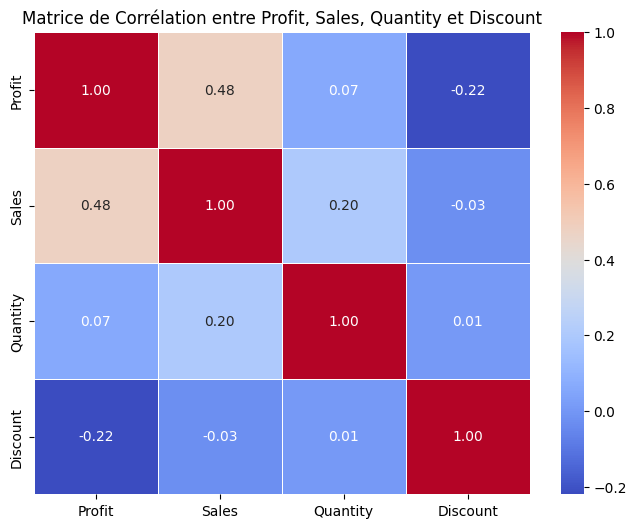

In [25]:
corr_matrix = df_analysis[['Profit', 'Sales', 'Quantity', 'Discount']].corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation entre Profit, Sales, Quantity et Discount')
plt.show()

C:\Users\sylva\AppData\Local\Temp\ipykernel_15764\3971380223.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_analysis, x='Segment', y='Profit', estimator='count', ci=None, palette='Set2')
C:\Users\sylva\AppData\Local\Temp\ipykernel_15764\3971380223.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_analysis, x='Segment', y='Profit', estimator='count', ci=None, palette='Set2')


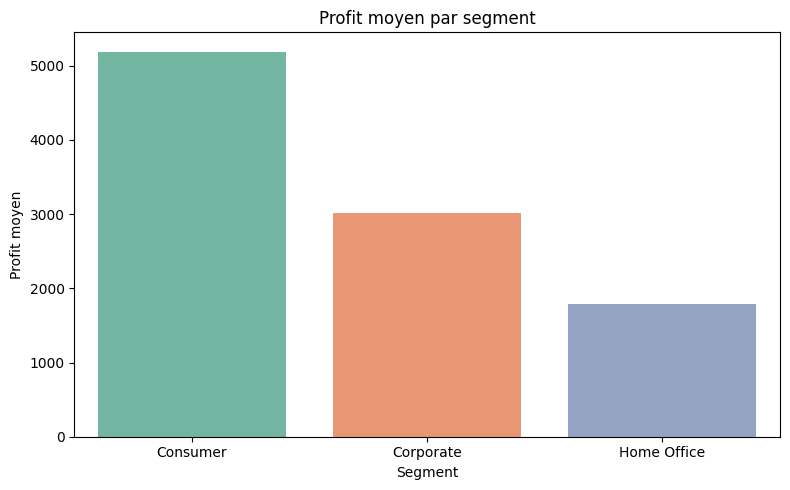

C:\Users\sylva\AppData\Local\Temp\ipykernel_15764\3971380223.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sub-Category', y='Profit', hue='Segment', estimator='sum', ci=None)


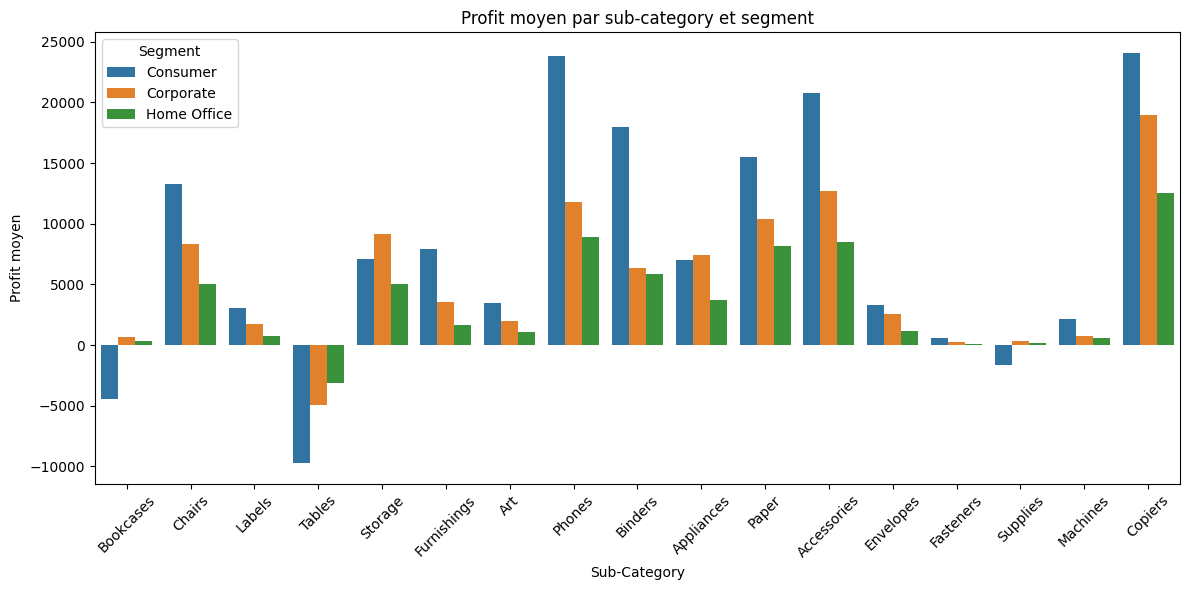

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que ton DataFrame s'appelle df, et contient les colonnes suivantes :
# 'Segment', 'Sub-Category', 'Profit'

# 1. Profit moyen par segment
plt.figure(figsize=(8, 5))
sns.barplot(data=df_analysis, x='Segment', y='Profit', estimator='count', ci=None, palette='Set2')
plt.title('Profit moyen par segment')
plt.ylabel('Profit moyen')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()

# 2. Profit par sub-category et segment
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Sub-Category', y='Profit', hue='Segment', estimator='sum', ci=None)
plt.title('Profit moyen par sub-category et segment')
plt.ylabel('Profit moyen')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


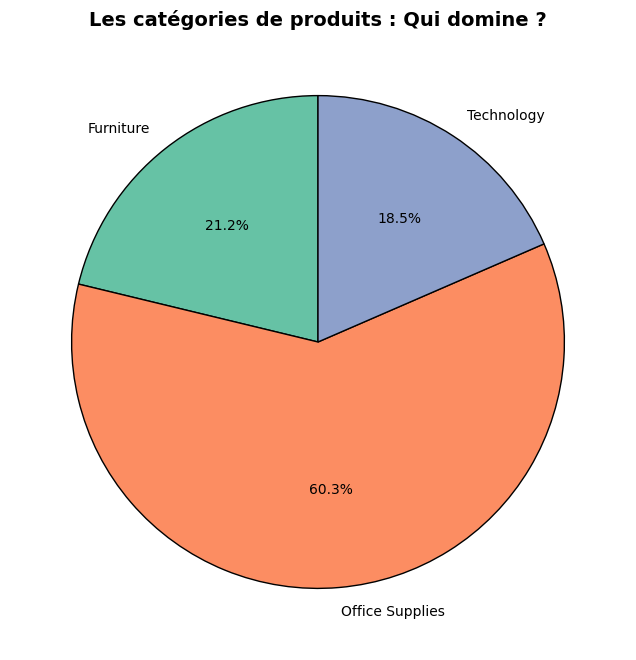

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de données
category_counts = df['Category'].value_counts().sort_index()

# Définir une palette de couleurs Seaborn
palette = sns.color_palette("Set2")

# Créer le pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=palette, wedgeprops={'edgecolor': 'black'})

# Modifications du titre et des labels
plt.title('Les catégories de produits : Qui domine ?', fontsize=14, fontweight='bold')
#plt.setp(plt.gca().texts, fontweight='bold', fontsize=12)  # Applique le gras aux labels des catégories

# Affichage
plt.show()


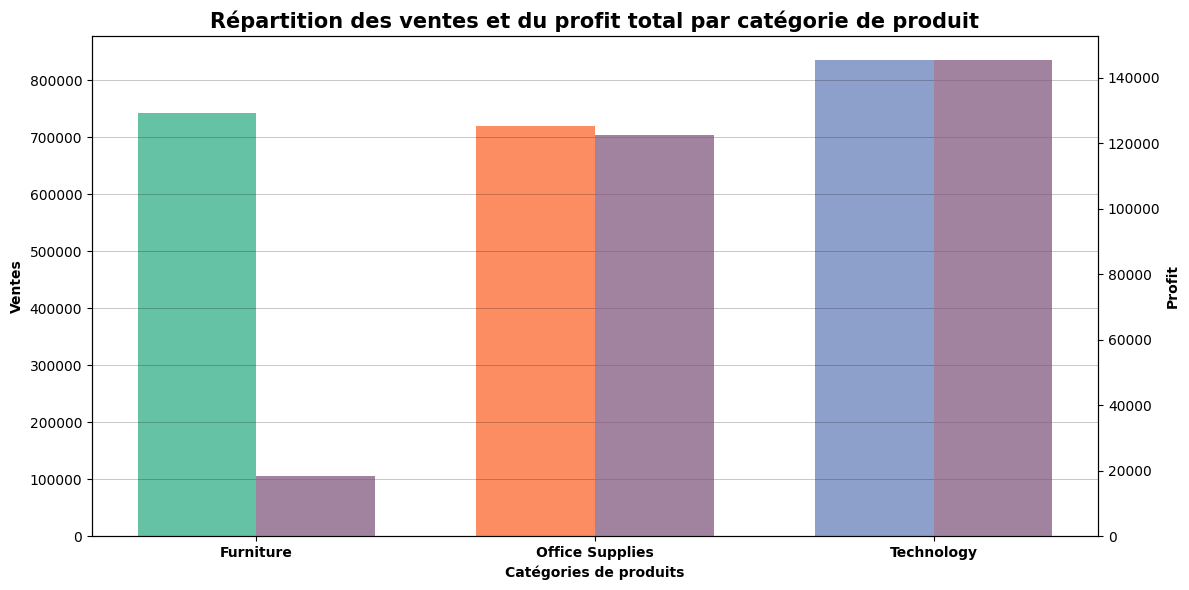

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Exemple de données
category_data = df.groupby('Category')[['Sales', 'Profit']].sum()

# Définir les palettes de couleurs Seaborn
palette_category = sns.color_palette("Set2")  # Couleurs uniques pour les catégories

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Créer des indices pour les ventes et les profits (décalage des positions)
index = np.arange(len(category_data))  # Indices pour chaque catégorie
width = 0.35  # Largeur des barres

# Barres pour les ventes (déplacées à droite), chaque catégorie a sa propre couleur
for i, category in enumerate(category_data.index):
    ax1.bar(index[i] - width / 2, category_data.loc[category, 'Sales'], 
            color=palette_category[i], width=width, alpha=1, label=category if i == 0 else "")

# Configuration de l'axe des Y pour les ventes
ax1.set_ylabel('Ventes', color='black', fontweight='bold')
ax1.set_xlabel('Catégories de produits', fontweight='bold')

# Créer un deuxième axe pour le profit
ax2 = ax1.twinx()

# Barres pour le profit (déplacées à gauche), une seule couleur pour le profit
palette_profit = "#7a4d76"  # Couleur uniforme pour le profit
for i, category in enumerate(category_data.index):
    ax2.bar(index[i] + width / 2, category_data.loc[category, 'Profit'], 
            color=palette_profit, width=width, alpha=0.7)

# Configuration de l'axe des Y pour le profit
ax2.set_ylabel('Profit', color='black', fontweight='bold')

# Ajouter des lignes de grille horizontales pour la lisibilité
ax1.grid(True, axis='y', linestyle='-', linewidth=0.5, color='black', alpha=0.3)

# Titre et personnalisation
plt.title('Répartition des ventes et du profit total par catégorie de produit', fontsize=15, fontweight='bold')

# Centrer les étiquettes des axes X
ax1.set_xticks(index)  # Assigner des indices égaux à chaque catégorie
ax1.set_xticklabels(category_data.index, rotation=0, ha='center', fontweight='bold')

# Affichage du graphique
plt.tight_layout()
plt.show()


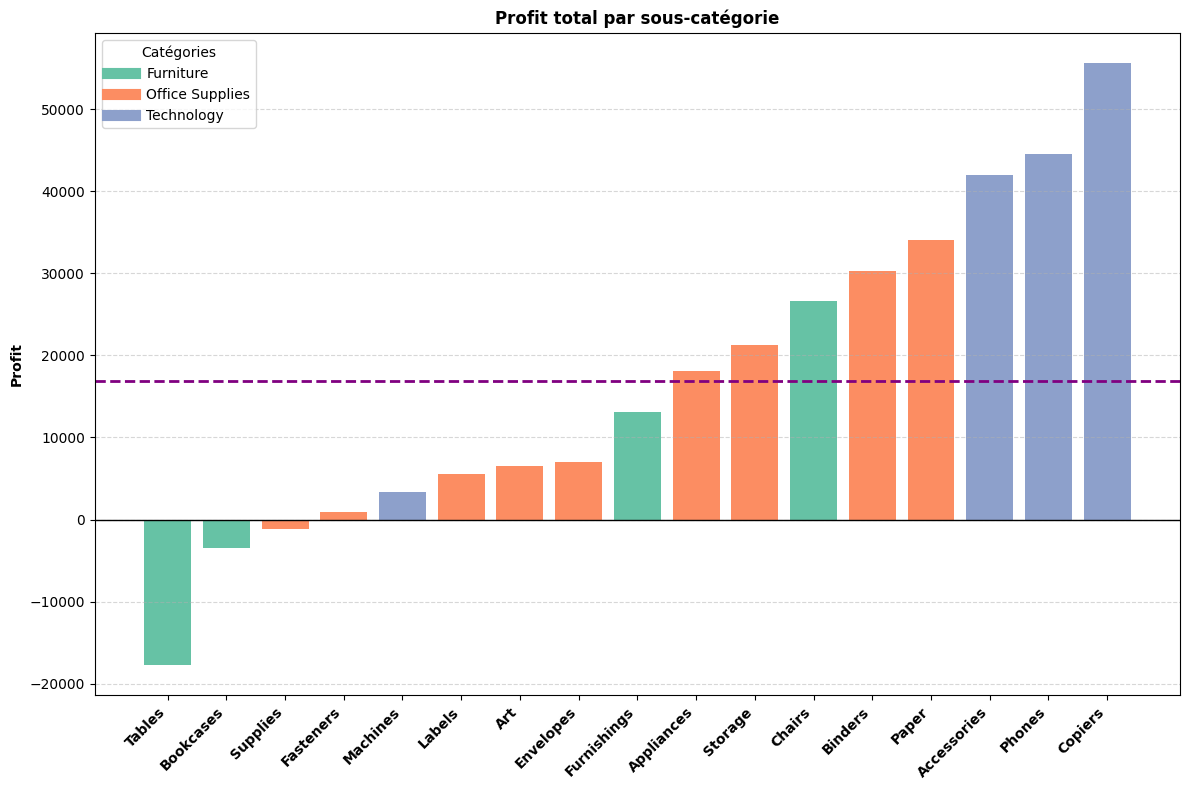

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Utiliser la palette de couleurs Set2 de Seaborn
palette = sns.color_palette("Set2")

# Extraire les catégories uniques et les trier
categories = df['Category'].unique()
categories.sort()  # Tri alphabétique

# Créer un dictionnaire qui associe chaque catégorie à une couleur de la palette
category_colors = {category: palette[i] for i, category in enumerate(categories)}

# Grouper les données : profit total par sous-catégorie
grouped = df.groupby('Sub-Category')['Profit'].sum().sort_values()
mean_profit = grouped.mean()
# Créer une liste de couleurs pour chaque sous-catégorie basée sur sa catégorie
colors = [category_colors[df[df['Sub-Category'] == subcat]['Category'].iloc[0]] for subcat in grouped.index]

# Ajouter la légende avec les catégories et leurs couleurs
handles = [plt.Line2D([0], [0], color=color, lw=8) for color in palette]  # Augmenter la largeur de ligne (lw)


# Affichage du bar chart avec les couleurs des catégories
plt.figure(figsize=(12, 8))
plt.bar(grouped.index, grouped.values, color=colors)
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.ylabel('Profit', fontweight='bold')
plt.title('Profit total par sous-catégorie', fontweight='bold')
plt.axhline(mean_profit, color='purple', linestyle='--', linewidth=2, label=f'Moyenne ({mean_profit:.0f}€)')
plt.axhline(0, color='black', linestyle='-', linewidth=1)
# Ajouter la légende avec les catégories et leurs couleurs
handles = [plt.Line2D([0], [0], color=color, lw=8) for color in palette]  # Augmenter la largeur de ligne (lw)
plt.legend(handles, sorted(categories), title='Catégories')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


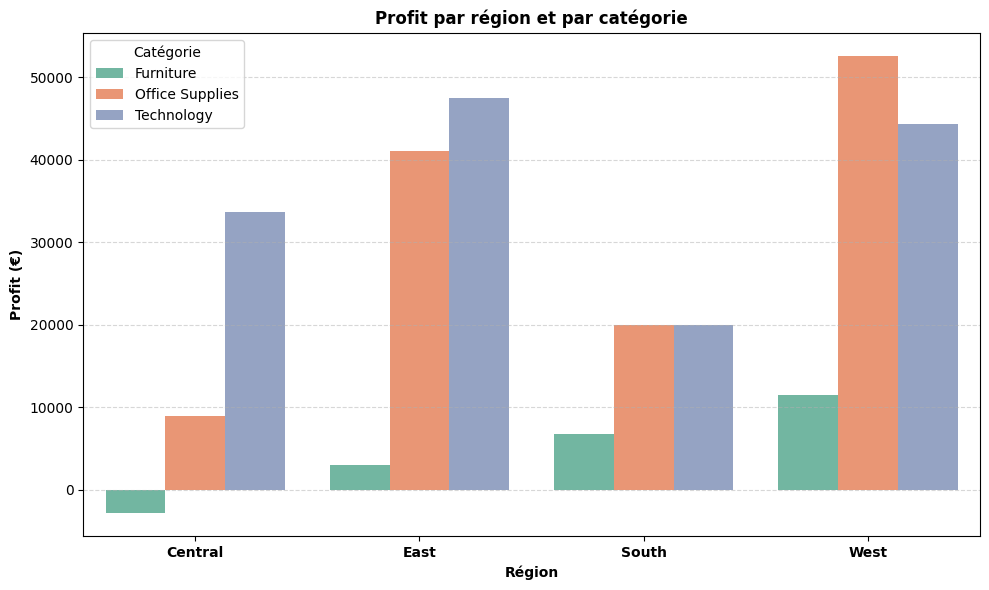

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple : remplacer ceci par ton DataFrame réel
# df = pd.read_csv("ton_fichier.csv")

# Grouper les données par région et catégorie
grouped = df.groupby(['Region', 'Category'])['Profit'].sum().reset_index()

# Créer une palette de couleurs basée sur Set2
palette = sns.color_palette("Set2", n_colors=grouped['Category'].nunique())
category_colors = dict(zip(sorted(grouped['Category'].unique()), palette))

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x='Region',
    y='Profit',
    hue='Category',
    palette=category_colors
)

plt.title("Profit par région et par catégorie", fontweight='bold')
plt.ylabel("Profit (€)", fontweight='bold')
plt.xlabel("Région", fontweight='bold')

# Mettre les noms des régions en gras
plt.xticks(fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Catégorie")
plt.tight_layout()
plt.show()


In [31]:
# Calcul du nombre d'ID clients uniques par segment
unique_customers = df.groupby('Segment')['Customer ID'].nunique()

# Calcul du nombre de commandes par segment
nb_commandes = df.groupby('Segment').size()

# Calcul du profit total par segment
profit_total = df.groupby('Segment')['Profit'].sum()

# Répartition du profit par catégorie (assumé qu'il y ait une colonne 'Category' pour les catégories)
profit_par_categorie = df.groupby(['Segment', 'Category'])['Profit'].sum().unstack(fill_value=0)

# Ajouter le nombre d'ID clients uniques et le nombre de commandes
profit_par_categorie['Unique Customers'] = unique_customers
profit_par_categorie['Nb of Orders'] = nb_commandes
profit_par_categorie['Total Profit'] = profit_total

# Calcul du pourcentage du profit total
pourcentage_profit_total = (profit_total / profit_total.sum()) * 100
profit_par_categorie['% of Total Profit'] = pourcentage_profit_total

# Calcul du nombre de commandes par client unique par segment (nouvelle colonne)
profit_par_categorie['Orders per Unique Customer'] = profit_par_categorie['Nb of Orders'] / profit_par_categorie['Unique Customers']

# Calcul du profit par client unique par segment (nouvelle colonne)
profit_par_categorie['Profit per Unique Customer'] = profit_par_categorie['Total Profit'] / profit_par_categorie['Unique Customers']

# Arrondir toutes les colonnes pertinentes à 2 décimales
profit_par_categorie = profit_par_categorie.round(2)

# Réorganiser les colonnes pour mettre 'Unique Customers' et 'Nb of Orders' comme les premières colonnes
ordered_columns = ['Unique Customers', 'Nb of Orders'] + [col for col in profit_par_categorie.columns if col not in ['Unique Customers', 'Nb of Orders', 'Orders per Unique Customer', 'Profit per Unique Customer', '% of Total Profit']] + ['Orders per Unique Customer', 'Profit per Unique Customer']

profit_par_categorie = profit_par_categorie[ordered_columns]

# Appliquer un style au tableau pour le rendre plus joli
styled_table = profit_par_categorie.style\
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('text-align', 'center'), ('padding', '8px')]},
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tr:hover', 'props': [('background-color', '#f1f1f1')]},
        {'selector': 'td, th', 'props': [('border', '1px solid #ddd'), ('padding', '8px')]},
    ])\
    .highlight_max(axis=0, color='lightgreen')\
    .highlight_min(axis=0, color='lightcoral')\
    .format({
        'Orders per Unique Customer': '{:.2f}',
        'Profit per Unique Customer': '{:.2f}€',
        '% of Total Profit': '{:.2f}%',
        'Total Profit': '{:.2f}€',
        'Furniture': '{:.2f}€',
        'Office Supplies': '{:.2f}€',
        'Technology': '{:.2f}€'
    })

# Affichage du tableau stylisé
styled_table


Category,Unique Customers,Nb of Orders,Furniture,Office Supplies,Technology,Total Profit,Orders per Unique Customer,Profit per Unique Customer
Segment,,,,,,,,
Consumer,409,5191,6991.08€,56330.32€,70797.81€,134119.21€,12.69,327.92€
Corporate,236,3020,7584.82€,40227.32€,44167.00€,91979.13€,12.80,389.74€
Home Office,148,1783,3875.38€,25933.16€,30490.14€,60298.68€,12.05,407.42€


In [32]:
# Calcul du nombre d'ID clients uniques par segment
unique_customers = df.groupby('Segment')['Customer ID'].nunique()

# Calcul du nombre de commandes par segment
nb_commandes = df.groupby('Segment').size()

# Calcul du profit total par segment
profit_total = df.groupby('Segment')['Profit'].sum()

# Calcul du profit par catégorie pour chaque segment
profit_par_segment_furniture = df[df['Category'] == 'Furniture'].groupby('Segment')['Profit'].sum()
profit_par_segment_office_supplies = df[df['Category'] == 'Office Supplies'].groupby('Segment')['Profit'].sum()
profit_par_segment_technology = df[df['Category'] == 'Technology'].groupby('Segment')['Profit'].sum()

# Nombre de commandes par client unique
orders_per_unique_customer = nb_commandes / unique_customers

# Calcul des ratios du profit par catégorie par rapport au nombre de clients uniques
ratio_furniture_profit = profit_par_segment_furniture / unique_customers
ratio_office_supplies_profit = profit_par_segment_office_supplies / unique_customers
ratio_technology_profit = profit_par_segment_technology / unique_customers

# Créer un DataFrame avec les informations demandées
result = pd.DataFrame({
    'Unique Customers': unique_customers,
    'Orders per Unique Customer': orders_per_unique_customer,
    'Nb of Orders': nb_commandes,
    'Furniture Profit Ratio': ratio_furniture_profit,
    'Office Supplies Profit Ratio': ratio_office_supplies_profit,
    'Technology Profit Ratio': ratio_technology_profit
})

# Remplir les valeurs manquantes avec 0 pour éviter des NaN
result = result.fillna(0)

# Appliquer le round(2) pour le ratio des commandes
result['Orders per Unique Customer'] = result['Orders per Unique Customer'].round(2)

# Formater les ratios en valeurs avec 2 décimales
result['Furniture Profit Ratio'] = result['Furniture Profit Ratio'].apply(lambda x: f'€{x:.2f}')
result['Office Supplies Profit Ratio'] = result['Office Supplies Profit Ratio'].apply(lambda x: f'€{x:.2f}')
result['Technology Profit Ratio'] = result['Technology Profit Ratio'].apply(lambda x: f'€{x:.2f}')

# Affichage du tableau
styled_result = result.style\
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold'), ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('text-align', 'center'), ('padding', '8px')]},
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tr:hover', 'props': [('background-color', '#f1f1f1')]},
        {'selector': 'td, th', 'props': [('border', '1px solid #ddd'), ('padding', '8px')]},
    ])\
    .highlight_max(axis=0, color='lightgreen')\
    .highlight_min(axis=0, color='lightcoral')\
    .format({
        'Orders per Unique Customer': '{:.2f}',
        'Profit per Unique Customer': '{:.2f}€',
        '% of Total Profit': '{:.2f}%',
        'Total Profit': '{:.2f}€',
        'Furniture': '{:.2f}€',
        'Office Supplies': '{:.2f}€',
        'Technology': '{:.2f}€'
    })

styled_result

,Unique Customers,Orders per Unique Customer,Nb of Orders,Furniture Profit Ratio,Office Supplies Profit Ratio,Technology Profit Ratio
Segment,,,,,,
Consumer,409,12.69,5191,€17.09,€137.73,€173.10
Corporate,236,12.80,3020,€32.14,€170.45,€187.15
Home Office,148,12.05,1783,€26.18,€175.22,€206.01


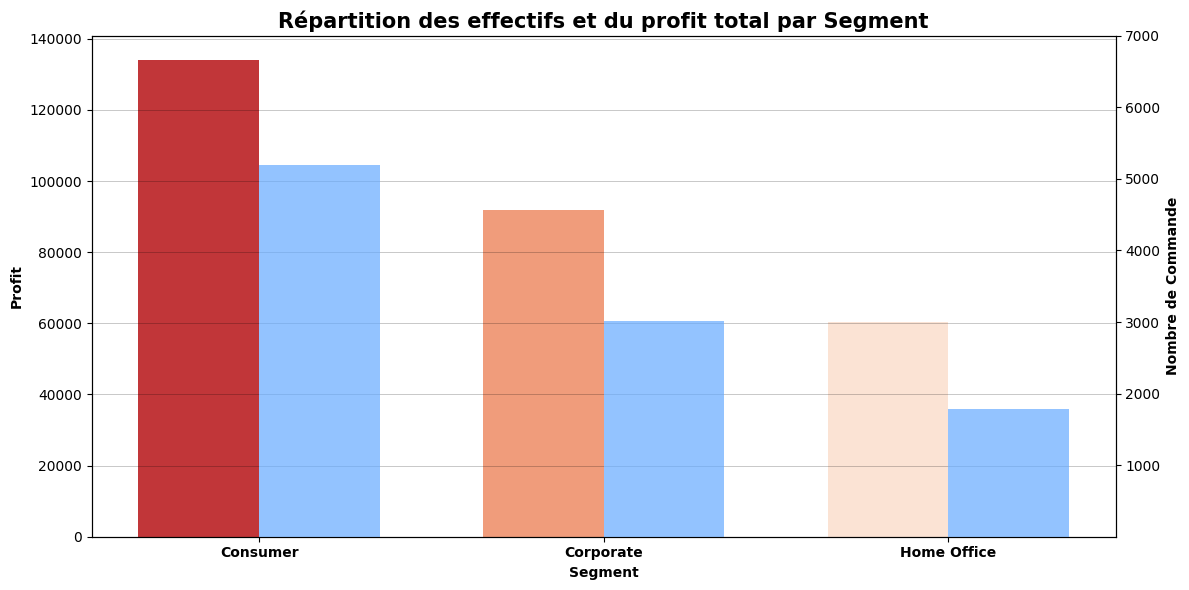

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Regrouper les données par segment, en calculant le profit et le nombre de personnes
segment_data = df.groupby('Segment')[['Profit']].sum()

# Calculer le nombre de personnes (occurrences) par segment et l'ajouter à segment_data
segment_data['Segment Size'] = df.groupby('Segment').size()

# Définir les palettes de couleurs Seaborn
palette_category = sns.color_palette("RdBu")  # Couleurs uniques pour les catégories

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Créer des indices pour les ventes et les profits (décalage des positions)
index = np.arange(len(segment_data))  # Indices pour chaque catégorie
width = 0.35  # Largeur des barres

# Barres pour les ventes (déplacées à droite), chaque catégorie a sa propre couleur
for i, segment in enumerate(segment_data.index):
    ax1.bar(index[i] - width / 2, segment_data.loc[segment, 'Profit'], 
            color=palette_category[i], width=width, alpha=1, label=category if i == 0 else "")

# Configuration de l'axe des Y pour les ventes
ax1.set_ylabel('Profit', color='black', fontweight='bold')
ax1.set_xlabel('Segment', fontweight='bold')

# Créer un deuxième axe pour le profit
ax2 = ax1.twinx()

# Barres pour le profit (déplacées à gauche), une seule couleur pour le profit
palette_profit = "#66aaff"  # Couleur uniforme pour le profit
for i, segment in enumerate(segment_data.index):
    ax2.bar(index[i] + width / 2, segment_data.loc[segment, 'Segment Size'], 
            color=palette_profit, width=width, alpha=0.7)

# Configuration de l'axe des Y pour le profit
ax2.set_yticks([1000,2000,3000,4000,5000,6000,7000])
ax2.set_ylabel('Nombre de Commande', color='black', fontweight='bold')

# Ajouter des lignes de grille horizontales pour la lisibilité
ax1.grid(True, axis='y', linestyle='-', linewidth=0.5, color='black', alpha=0.3)

# Titre et personnalisation
plt.title('Répartition des effectifs et du profit total par Segment', fontsize=15, fontweight='bold')

# Centrer les étiquettes des axes X
ax1.set_xticks(index)  # Assigner des indices égaux à chaque catégorie
ax1.set_xticklabels(segment_data.index, rotation=0, ha='center', fontweight='bold')

# Affichage du graphique
plt.tight_layout()
plt.show()


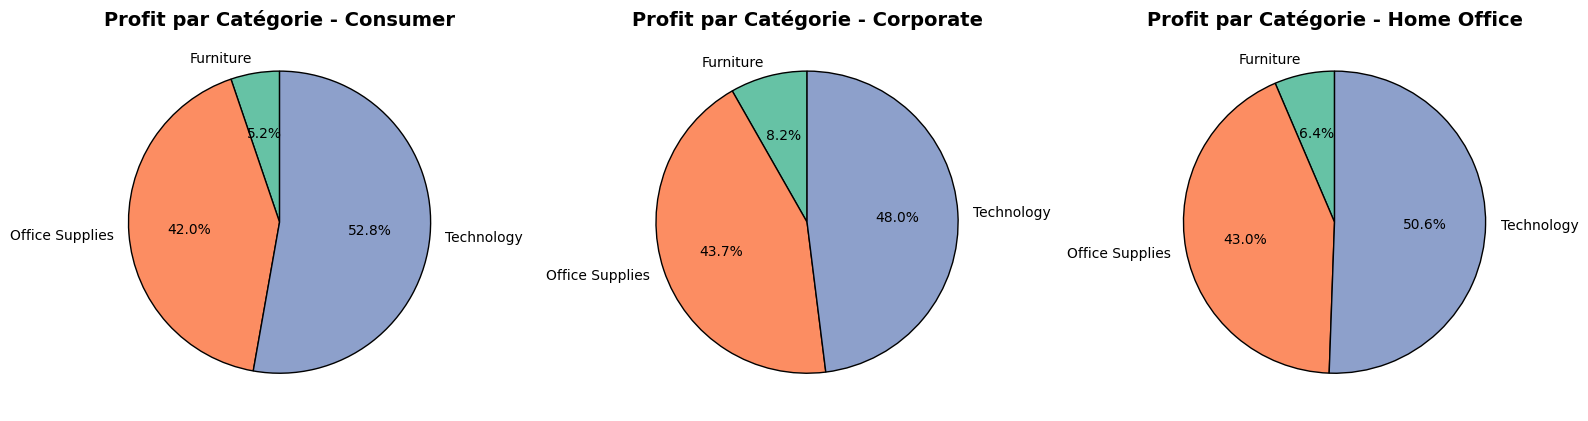

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouper les données par segment et catégorie, puis calculer les profits
segment_category_profit = df.groupby(['Segment', 'Category'])['Profit'].sum().unstack()

# Créer un pie chart pour chaque segment
fig, axes = plt.subplots(nrows=1, ncols=len(segment_category_profit), figsize=(16, 8))

# Assurer que axes est toujours une liste, même avec un seul segment
if len(segment_category_profit) == 1:
    axes = [axes]

# Créer un pie chart pour chaque segment
for i, (segment, profit_data) in enumerate(segment_category_profit.iterrows()):
    axes[i].pie(profit_data, labels=profit_data.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, colors=sns.color_palette("Set2", len(profit_data)))
    axes[i].set_title(f'Profit par Catégorie - {segment}', fontsize=14, weight='bold')

# Ajuster l'affichage pour éviter le chevauchement
plt.tight_layout()
plt.show()


<Figure size 1200x700 with 0 Axes>

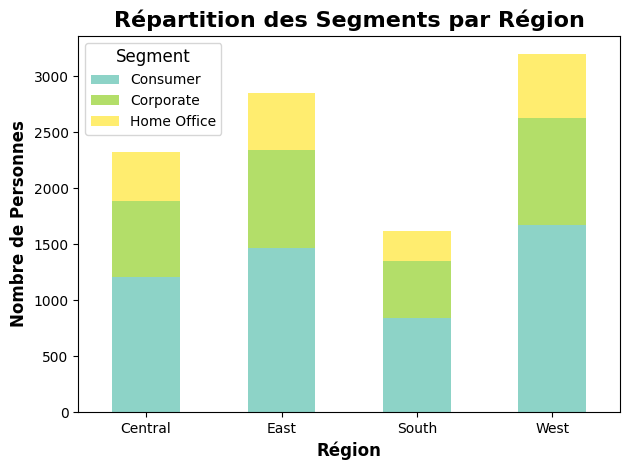

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouper les données par région et segment, puis compter le nombre d'occurrences de chaque segment dans chaque région
region_segment_count = df.groupby(['Region', 'Segment']).size().unstack()

# Création d'un bar chart empilé pour chaque région, avec les segments empilés
plt.figure(figsize=(12, 7))
region_segment_count.plot(kind='bar', stacked=True, colormap='Set3')

# Titres et labels
plt.title('Répartition des Segments par Région', fontsize=16, weight='bold')
plt.xlabel('Région', fontsize=12, weight='bold')
plt.ylabel('Nombre de Personnes', fontsize=12, weight='bold')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Segment', fontsize=10, title_fontsize=12, loc='upper left')

# Affichage du graphique
plt.tight_layout()
plt.show()


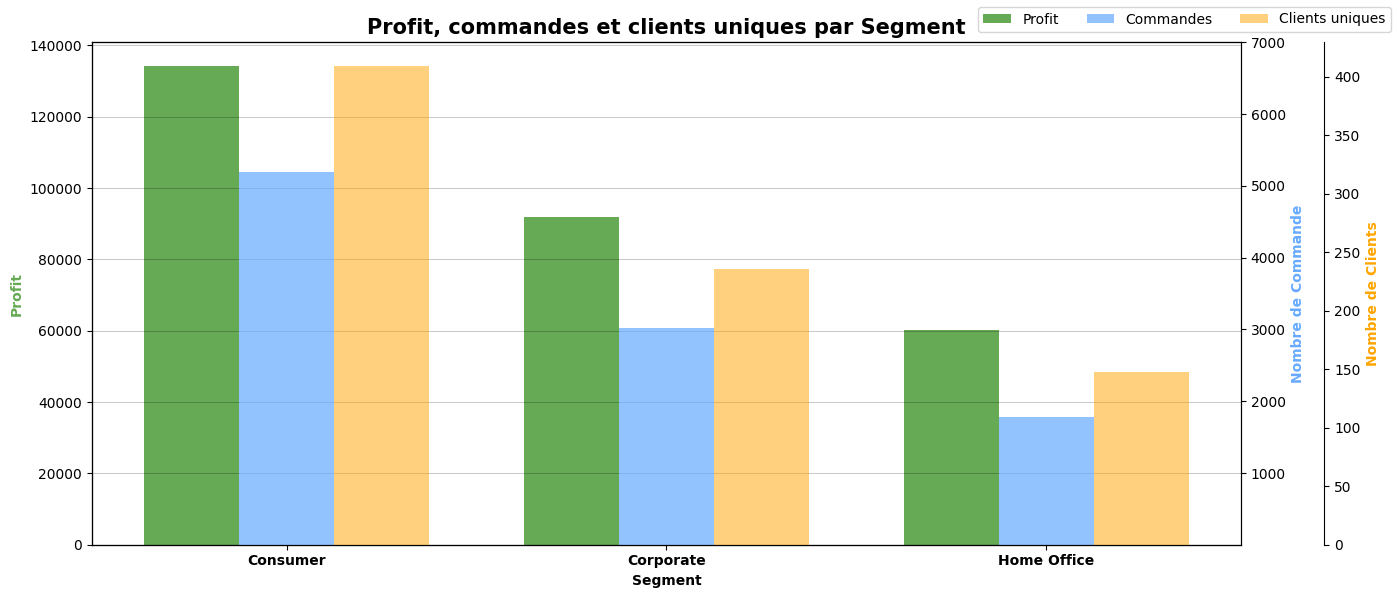

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Regrouper les données par segment et calculer les profits
segment_data = df.groupby('Segment')[['Profit']].sum()

# Nombre de commandes (lignes)
segment_data['Segment Size'] = df.groupby('Segment').size()

# Nombre de clients uniques par segment
unique_customers = df.groupby('Segment')['Customer ID'].nunique()
segment_data['Unique Customers'] = unique_customers

# Palettes de couleurs
palette_category = sns.color_palette("RdBu", n_colors=len(segment_data))

# Création de la figure
fig, ax1 = plt.subplots(figsize=(14, 6))

index = np.arange(len(segment_data))
width = 0.25  # Largeur réduite pour caser 3 barres

# Axe 1 : Profit
for i, segment in enumerate(segment_data.index):
    ax1.bar(index[i] - width, segment_data.loc[segment, 'Profit'],
            color="#66aa55", width=width, label='Profit' if i == 0 else "")

ax1.set_ylabel('Profit', color='#66aa55', fontweight='bold')
ax1.set_xlabel('Segment', fontweight='bold')

# Axe 2 : Nombre de commandes
ax2 = ax1.twinx()
for i, segment in enumerate(segment_data.index):
    ax2.bar(index[i], segment_data.loc[segment, 'Segment Size'],
            color="#66aaff", width=width, alpha=0.7, label='Commandes' if i == 0 else "")

# Axe 3 : Nombre de clients uniques
ax3 = ax1.twinx()
ax2.set_yticks([1000,2000,3000,4000,5000,6000,7000])
ax3.spines["right"].set_position(("outward", 60))  # Décale le troisième axe
for i, segment in enumerate(segment_data.index):
    ax3.bar(index[i] + width, segment_data.loc[segment, 'Unique Customers'],
            color="#ffa500", width=width, alpha=0.5, label='Clients uniques' if i == 0 else "")

# Ticks et légende
ax1.set_xticks(index)
ax1.set_xticklabels(segment_data.index, fontweight='bold')

# Grille + titre
ax1.grid(True, axis='y', linestyle='-', linewidth=0.5, color='black', alpha=0.3)
plt.title('Profit, commandes et clients uniques par Segment', fontsize=15, fontweight='bold')


ax2.set_ylabel('Nombre de Commande', color='#66aaff', fontweight='bold')
ax3.set_ylabel('Nombre de Clients', color='#ffa500', fontweight='bold')

# Légende manuelle
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2, ax3]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper right', ncol=3)

plt.tight_layout()
plt.show()


In [37]:
# Calcul du profit total par catégorie
profit_par_categorie = df.groupby('Category')['Profit'].sum()

# Affichage du résultat
print(profit_par_categorie)


Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64


In [38]:
# Calcul du profit total par catégorie et segment
profit_par_segment_categorie = df.groupby(['Segment', 'Category'])['Profit'].sum().reset_index()

# Affichage du résultat
print(profit_par_segment_categorie)


       Segment         Category      Profit
0     Consumer        Furniture   6991.0786
1     Consumer  Office Supplies  56330.3210
2     Consumer       Technology  70797.8096
3    Corporate        Furniture   7584.8158
4    Corporate  Office Supplies  40227.3202
5    Corporate       Technology  44166.9980
6  Home Office        Furniture   3875.3784
7  Home Office  Office Supplies  25933.1596
8  Home Office       Technology  30490.1405


In [39]:
# Nombre de clients uniques par segment
unique_customers = df.groupby('Segment')['Customer ID'].nunique()

# Nombre de commandes par segment
nb_orders = df.groupby('Segment').size()

# Nombre de commandes par client unique
orders_per_customer = (nb_orders / unique_customers).round(2)

# Nombre total de commandes par segment et catégorie
orders_by_category = df.groupby(['Segment', 'Category']).size().unstack(fill_value=0)

# Total des commandes par segment (pour calcul des pourcentages)
total_orders_by_segment = orders_by_category.sum(axis=1)

# Pourcentage de commandes par catégorie
percent_furniture = (orders_by_category['Furniture'] / total_orders_by_segment * 100).round(2)
percent_technology = (orders_by_category['Technology'] / total_orders_by_segment * 100).round(2)
percent_office = (orders_by_category['Office Supplies'] / total_orders_by_segment * 100).round(2)

# Création du DataFrame final
tableau_segments = pd.DataFrame({
    'Unique Customers': unique_customers,
    'Orders per Customer': orders_per_customer,
    '% Furniture Orders': percent_furniture,
    '% Tech Orders': percent_technology,
    '% Office Orders': percent_office
})

# Affichage du tableau
tableau_segments


,Unique Customers,Orders per Customer,% Furniture Orders,% Tech Orders,% Office Orders
Segment,,,,,
Consumer,409,12.69,21.44,18.32,60.24
Corporate,236,12.80,21.39,18.34,60.26
Home Office,148,12.05,20.30,19.18,60.52


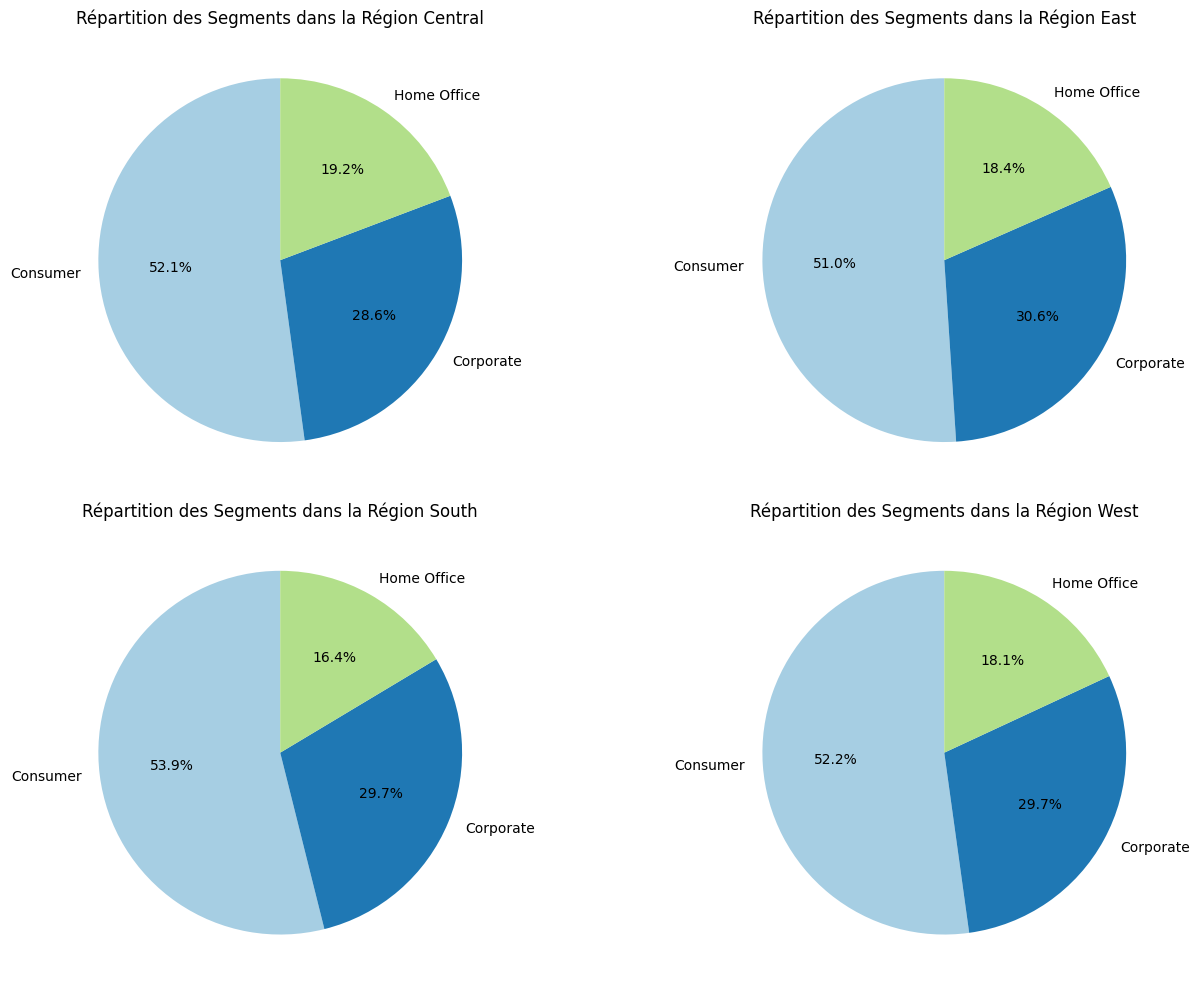

In [40]:
# Calcul du nombre de Customer ID par Segment et Région
region_segment_counts = df.groupby(['Region', 'Segment'])['Customer ID'].nunique().unstack(fill_value=0)

# Calcul des pourcentages
region_segment_percentage = region_segment_counts.div(region_segment_counts.sum(axis=1), axis=0) * 100

# Affichage du graphique par région
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 pour 4 régions
axes = axes.ravel()

# Créer un camembert pour chaque région
for i, region in enumerate(region_segment_percentage.index):
    axes[i].pie(region_segment_percentage.loc[region], 
                labels=region_segment_percentage.columns, 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=plt.cm.Paired.colors[:len(region_segment_percentage.columns)])
    axes[i].set_title(f"Répartition des Segments dans la Région {region}")

plt.tight_layout()
plt.show()

In [41]:
region_segment_counts

Segment,Consumer,Corporate,Home Office
Region,,,
Central,328,180,121
East,344,206,124
South,276,152,84
West,358,204,124


In [42]:
unique_customers

Segment
Consumer       409
Corporate      236
Home Office    148
Name: Customer ID, dtype: int64

In [43]:
# Comptage du nombre de Customer ID uniques par région et segment
region_segment_counts = df.groupby(['Region', 'Segment'])['Customer ID'].nunique().unstack()

# Affichage du tableau de comptage des Customer ID uniques par région et segment
print(region_segment_counts)


Segment  Consumer  Corporate  Home Office
Region                                   
Central       328        180          121
East          344        206          124
South         276        152           84
West          358        204          124


In [44]:
print(df_analysis['Order Date'].nunique())

1237


In [45]:
print(df_analysis['Ship Date'].nunique())

1334


In [48]:
counts = df_analysis['Order Date'].dt.date.value_counts().sort_index()

for date, count in counts.items():
    print(f"| {str(date):<12} | {str(count):^16} |")


| 2014-01-03   |        1         |
| 2014-01-04   |        3         |
| 2014-01-05   |        1         |
| 2014-01-06   |        9         |
| 2014-01-07   |        2         |
| 2014-01-09   |        2         |
| 2014-01-10   |        2         |
| 2014-01-11   |        1         |
| 2014-01-13   |        11        |
| 2014-01-14   |        1         |
| 2014-01-15   |        1         |
| 2014-01-16   |        4         |
| 2014-01-18   |        1         |
| 2014-01-19   |        4         |
| 2014-01-20   |        17        |
| 2014-01-21   |        1         |
| 2014-01-23   |        2         |
| 2014-01-26   |        9         |
| 2014-01-27   |        3         |
| 2014-01-28   |        1         |
| 2014-01-30   |        2         |
| 2014-01-31   |        1         |
| 2014-02-01   |        1         |
| 2014-02-02   |        3         |
| 2014-02-03   |        2         |
| 2014-02-04   |        3         |
| 2014-02-06   |        4         |
| 2014-02-07   |        2   

In [53]:
import pandas as pd

# Conversion au format datetime si nécessaire
order_dates = pd.to_datetime(df_analysis['Order Date'])

# Grouper par semaine (année-semaine) sans modifier le DataFrame d'origine
weekly_counts = order_dates.dt.to_period('W').apply(lambda r: r.start_time).value_counts().sort_index()

# Convertir en DataFrame pour l'affichage clair
weekly_table = pd.DataFrame({
    'Week': weekly_counts.index,
    'Order Count': weekly_counts.values
})

# Moyenne, min et max
mean_count = weekly_table['Order Count'].mean()
min_row = weekly_table.loc[weekly_table['Order Count'].idxmin()]
max_row = weekly_table.loc[weekly_table['Order Count'].idxmax()]

# Résultats
print("Tableau des commandes par semaine :")
print(weekly_table)

print("\nMoyenne des commandes par semaine :", round(mean_count, 2))
print("\nSemaine avec le moins de commandes :", min_row['Week'], "->", min_row['Order Count'], "commandes")
print("Semaine avec le plus de commandes :", max_row['Week'], "->", max_row['Order Count'], "commandes")


Tableau des commandes par semaine :
          Week  Order Count
0   2013-12-30            5
1   2014-01-06           16
2   2014-01-13           22
3   2014-01-20           29
4   2014-01-27           11
..         ...          ...
204 2017-11-27          130
205 2017-12-04          131
206 2017-12-11           77
207 2017-12-18           99
208 2017-12-25           67

[209 rows x 2 columns]

Moyenne des commandes par semaine : 47.82

Semaine avec le moins de commandes : 2013-12-30 00:00:00 -> 5 commandes
Semaine avec le plus de commandes : 2017-12-04 00:00:00 -> 131 commandes


C:\Users\sylva\AppData\Local\Temp\ipykernel_15764\1744478793.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Profit', data=yearly_profit, palette='Blues')


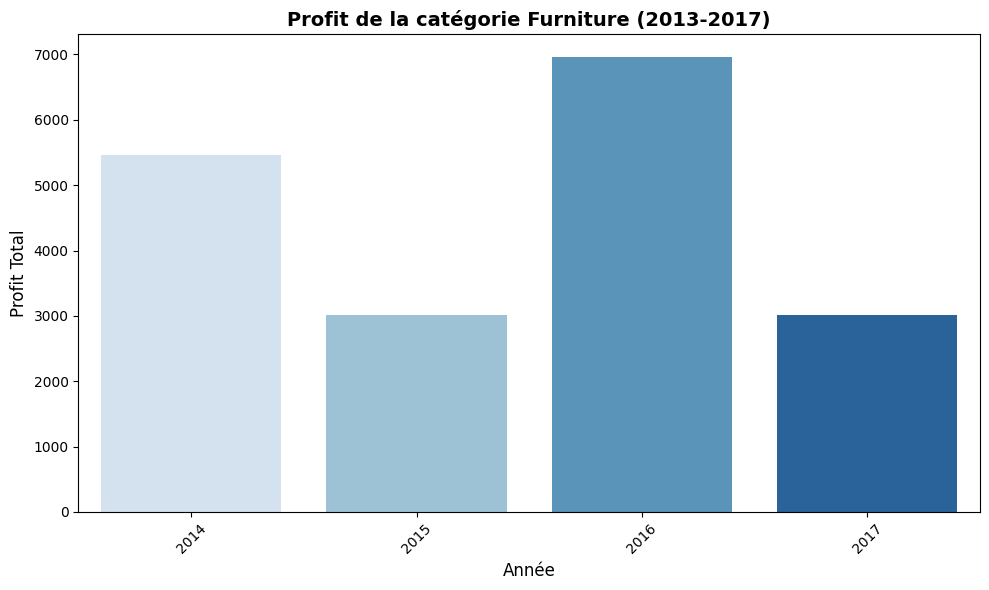

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtrer pour la catégorie 'Furniture' et pour les années de 2013 à 2017
furniture_data = df_analysis[df_analysis['Category'] == 'Furniture']

# 2. Créer une nouvelle série d'années, regroupant 2013 avec 2014
furniture_data_year = furniture_data.copy()
furniture_data_year['Year'] = furniture_data_year['Order Date'].dt.year
furniture_data_year['Year'] = furniture_data_year['Year'].replace({2013: 2014})

# 3. Calculer le profit par année
yearly_profit = furniture_data_year.groupby('Year')['Profit'].sum().reset_index()

# 4. Créer un graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Profit', data=yearly_profit, palette='Blues')

# 5. Personnaliser le graphique
plt.title('Profit de la catégorie Furniture (2013-2017)', fontsize=14, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Profit Total', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()


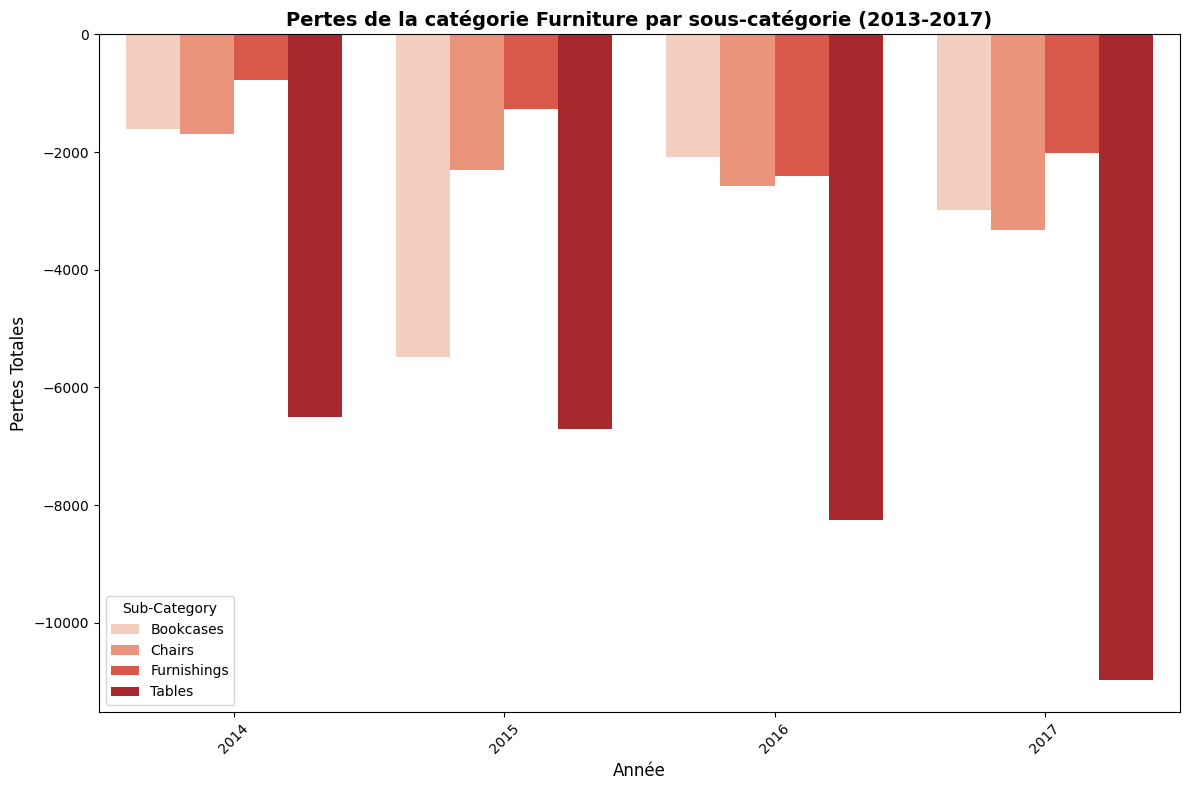

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtrer pour la catégorie 'Furniture' et pour les années de 2013 à 2017
furniture_data = df_analysis[df_analysis['Category'] == 'Furniture']

# 2. Créer une nouvelle série d'années, regroupant 2013 avec 2014
furniture_data_year = furniture_data.copy()
furniture_data_year['Year'] = furniture_data_year['Order Date'].dt.year
furniture_data_year['Year'] = furniture_data_year['Year'].replace({2013: 2014})

# 3. Filtrer pour ne conserver que les bénéfices négatifs
furniture_data_loss = furniture_data_year[furniture_data_year['Profit'] < 0]

# 4. Regrouper par sous-catégorie et année et calculer le profit (négatif) total
loss_by_subcategory = furniture_data_loss.groupby(['Sub-Category', 'Year'])['Profit'].sum().reset_index()

# 5. Créer un graphique pour visualiser les pertes par sous-catégorie et année
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Profit', hue='Sub-Category', data=loss_by_subcategory, palette='Reds')

# 6. Personnaliser le graphique
plt.title('Pertes de la catégorie Furniture par sous-catégorie (2013-2017)', fontsize=14, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Pertes Totales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()


In [64]:
# 1. Extraire l'année sans ajouter de colonne
orders_per_year = df_analysis.groupby(df_analysis['Order Date'].dt.year).size()

# 2. Afficher le nombre de commandes par année
print("Nombre de commandes par année :")
print(orders_per_year)


Nombre de commandes par année :
Order Date
2014    1993
2015    2102
2016    2587
2017    3312
dtype: int64


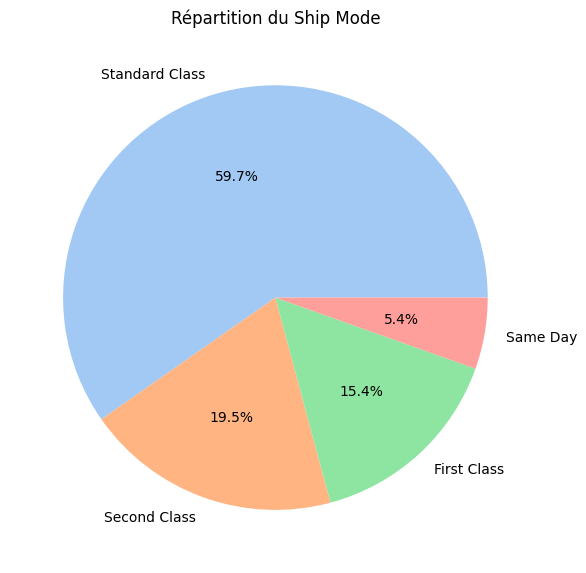

In [66]:
# Pie chart de la répartition du Ship Mode
ship_counts = df_analysis['Ship Mode'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(ship_counts, labels=ship_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Répartition du Ship Mode')
plt.tight_layout()
plt.show()


C:\Users\sylva\AppData\Local\Temp\ipykernel_15764\1445842562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_ship.index, y=profit_by_ship.values, palette='crest')


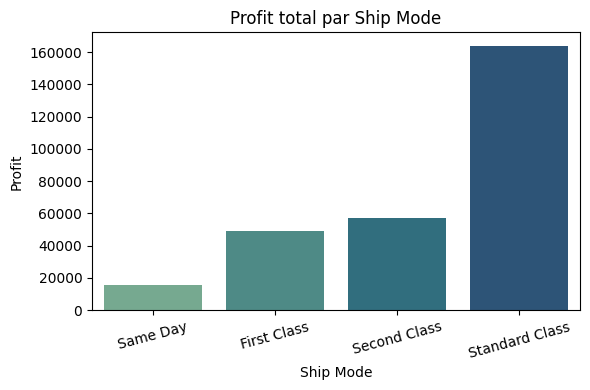

In [67]:
# Bar chart du profit par Ship Mode
profit_by_ship = df_analysis.groupby('Ship Mode')['Profit'].sum().sort_values()

plt.figure(figsize=(6, 4))
sns.barplot(x=profit_by_ship.index, y=profit_by_ship.values, palette='crest')

plt.title('Profit total par Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Profit')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [68]:
# Part du nombre total de commandes par Ship Mode
ship_counts_ratio = df_analysis['Ship Mode'].value_counts(normalize=True)

# Part du profit total par Ship Mode
profit_ratio = df_analysis.groupby('Ship Mode')['Profit'].sum()
profit_ratio /= profit_ratio.sum()

# Assemblage des deux dans un même DataFrame pour comparaison
ratio_df = pd.DataFrame({
    'Order Share': ship_counts_ratio,
    'Profit Share': profit_ratio
})

# Affichage
ratio_df = ratio_df.sort_index()
ratio_df.round(3)


,Order Share,Profit Share
Ship Mode,,
First Class,0.154,0.171
Same Day,0.054,0.055
Second Class,0.195,0.201
Standard Class,0.597,0.573


In [69]:
# Filtrer uniquement la catégorie Furniture
furniture_df = df_analysis[df_analysis['Category'] == 'Furniture']

# Calculer la moyenne des discounts par sub-category
mean_discount_by_subcat = furniture_df.groupby('Sub-Category')['Discount'].mean().sort_values(ascending=False)

# Afficher le résultat arrondi à 2 décimales
mean_discount_by_subcat.round(2)


Sub-Category
Tables         0.26
Bookcases      0.21
Chairs         0.17
Furnishings    0.14
Name: Discount, dtype: float64

In [70]:
# Filtrer uniquement la catégorie Furniture
furniture_df = df_analysis[df_analysis['Category'] == 'Office Supplies']

# Calculer la moyenne des discounts par sub-category
mean_discount_by_subcat = furniture_df.groupby('Sub-Category')['Discount'].mean().sort_values(ascending=False)

# Afficher le résultat arrondi à 2 décimales
mean_discount_by_subcat.round(2)

Sub-Category
Binders       0.37
Appliances    0.17
Fasteners     0.08
Envelopes     0.08
Supplies      0.08
Paper         0.07
Art           0.07
Storage       0.07
Labels        0.07
Name: Discount, dtype: float64

In [71]:
# Filtrer uniquement la catégorie Furniture
furniture_df = df_analysis[df_analysis['Category'] == 'Technology']

# Calculer la moyenne des discounts par sub-category
mean_discount_by_subcat = furniture_df.groupby('Sub-Category')['Discount'].mean().sort_values(ascending=False)

# Afficher le résultat arrondi à 2 décimales
mean_discount_by_subcat.round(2)

Sub-Category
Machines       0.31
Copiers        0.16
Phones         0.15
Accessories    0.08
Name: Discount, dtype: float64